<div style="text-align: center;">
    <h3>Applied Data Science Project</h3>
    <h2><b>Patient Preference Studies Classification System</b><h2>
    <h1><b>Data Preparation</b></h1>
    <h5>Francesco Giuseppe Gillio</h5>
    <h5>César Augusto Seminario Yrigoyen</h5>
</div>

<div style="text-align: center;">
    <img src="https://upload.wikimedia.org/wikipedia/it/4/47/Logo_PoliTo_dal_2021_blu.png" width="250">
</div>

https://github.com/adsp-polito/2024-P8-PPS

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# *Drive* **Setup**

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Patient Preference Studies Binary Classifier
root = 'PPS-BC'

In [4]:
path = os.path.join('/content/drive/MyDrive', root)
if not os.path.exists(path):
    os.makedirs(path)

In [5]:
paths = {
    'input-data': f'{root}/input-data',
    'notebook-results': f'{root}/notebook-results',
}

In [6]:
for key, value in paths.items():
    path = os.path.join('/content/drive/MyDrive', value)
    if not os.path.exists(path):
        os.makedirs(path)

**Notebook Directory Structure**
```
/PPS-BC
├── /input-data
│   └── ...
└── /notebook-results
    └── /data-charts
        └── ...
```

# *Data* **Collection & Cleaning**

**Requirements**

In [7]:
import numpy as np
import pandas as pd

In [8]:
np.random.seed(42)

In [9]:
output = f"/content/drive/MyDrive/{paths['input-data']}"

**Data Collection**
* **Dataset**: output of a **Pubmed** search string on **Patient Preferences Studies**
* **URL**: https://raw.githubusercontent.com/adsp-polito/2024-P8-PPS/refs/heads/main/data/articles-2023.csv

In [10]:
URL = 'https://raw.githubusercontent.com/adsp-polito/2024-P8-PPS/refs/heads/main/data/articles-2023.csv'

**Data Processing**

1. Extract and store data into a **pandas DataFrame**

In [11]:
data = pd.read_csv(URL)

print(data.shape)
data.head()

(1215, 17)


,Title,Authors,Abstract,Published Year,Published Month,Journal,Volume,Issue,Pages,Accession Number,DOI,Ref,Covidence #,Study,Notes,Tags,Label
0,Preferences for disease-related information an...,de Hosson M; De Groote K; Wynendaele H; Mosque...,PURPOSE: The transition towards adult-focused ...,2023,Sep,Eur J Pediatr,182,9,3917-3927,NaN,10.1007/s00431-023-05020-1,37351648,#930,deHosson 2023,NaN,NaN,0
1,Advance Care Planning in South Korea.,Kim YJ; Kim SH,South Korea is an Asian country with a very lo...,2023,Aug,Z Evid Fortbild Qual Gesundhwes,180,NaN,68-73,NaN,10.1016/j.zefq.2023.04.014,37353427,#1010,Kim 2023,NaN,NaN,0
2,Stakeholders' preferences for the design and d...,Vo LK; Allen MJ; Cunich M; Thillainadesan J; M...,This systematic review aimed to synthesise evi...,2024,Jan,Soc Sci Med,340,NaN,116459,NaN,10.1016/j.socscimed.2023.116459,38048738,#513,Vo 2024,NaN,NaN,1
3,Discrete Choice Experiments in Health State Va...,Wang H; Rowen DL; Brazier JE; Jiang L,BACKGROUND: Discrete choice experiments (DCEs)...,2023,May,Appl Health Econ Health Policy,21,3,405-418,NaN,10.1007/s40258-023-00794-9,36997744,#1276,Wang 2023,NaN,NaN,1
4,Improving methods of clinical practice guideli...,Djulbegovic B; Hozo I; Cuker A; Guyatt G,BACKGROUND: Current methods for developing cli...,2023,Dec,J Eval Clin Pract,NaN,NaN,NaN,NaN,10.1111/jep.13953,38073027,#573,Djulbegovic 2023,NaN,NaN,0


2. Extract prediction-relevant features: **Title, Abstract** & **Label**

In [12]:
data = data[['Title', 'Abstract', 'Label']]
data.rename(
    columns={
        'Title': 'title',
        'Abstract': 'abstract',
        'Label': 'label',
    },
    inplace=True
)

print(data.shape)
data.head()

(1215, 3)


,title,abstract,label
0,Preferences for disease-related information an...,PURPOSE: The transition towards adult-focused ...,0
1,Advance Care Planning in South Korea.,South Korea is an Asian country with a very lo...,0
2,Stakeholders' preferences for the design and d...,This systematic review aimed to synthesise evi...,1
3,Discrete Choice Experiments in Health State Va...,BACKGROUND: Discrete choice experiments (DCEs)...,1
4,Improving methods of clinical practice guideli...,BACKGROUND: Current methods for developing cli...,0


In [13]:
data.to_csv(f'{output}/raw-articles-2023.csv', index=False)

**Data Cleaning**

1. Detect **NaN** values in the dataset

In [14]:
data.isnull().sum()

,0
title,0
abstract,44
label,0


2. Replace NaN data with **empty strings**

In [15]:
data = data.fillna('.')
data.reset_index(drop=True, inplace=True)

In [16]:
data.to_csv(f'{output}/clean-articles-2023.csv', index=False)

3. Remove **stop word**

In [17]:
# pass

**BERT** tokenization handles **stop words**: BERT embeddings encode entire sentences by means of each token, also stop words

# **Exploratory** *Data Analysis*

**Requirements**

In [18]:
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS

In [19]:
np.random.seed(42)

In [20]:
crest = sns.color_palette(
    'crest',
    as_cmap=True
)
palette = sns.color_palette('crest')
polito = palette[-1]
unito = palette[1]

In [21]:
input = f"/content/drive/MyDrive/{paths['input-data']}"
data = pd.read_csv(f'{input}/clean-articles-2023.csv')

In [22]:
path = f"/content/drive/MyDrive/{paths['notebook-results']}"
output = os.path.join(path, 'data-charts')
if not os.path.exists(output):
    os.makedirs(output)

**Data Analysis**

1. Assess the **Title Average Length** and the **Abstract Average Lenght** (Word Count)

In [23]:
data['title-length'] = data['title'].astype(str).apply(lambda x: len(x.split()))
data['abstract-length'] = data['abstract'].astype(str).apply(lambda x: len(x.split()))

print(f"Title Average Length (Word Count): {data['title-length'].mean():.2f} words")
print(f"Abstract Average Lenght (Word Count): {data['abstract-length'].mean():.2f} words")
data.head()

Title Average Length (Word Count): 15.16 words
Abstract Average Lenght (Word Count): 256.62 words


,title,abstract,label,title-length,abstract-length
0,Preferences for disease-related information an...,PURPOSE: The transition towards adult-focused ...,0,18,346
1,Advance Care Planning in South Korea.,South Korea is an Asian country with a very lo...,0,6,199
2,Stakeholders' preferences for the design and d...,This systematic review aimed to synthesise evi...,1,18,300
3,Discrete Choice Experiments in Health State Va...,BACKGROUND: Discrete choice experiments (DCEs)...,1,15,357
4,Improving methods of clinical practice guideli...,BACKGROUND: Current methods for developing cli...,0,21,225


2. Detect **Outliers** in the dataset (rows with **Abstract Length** out of bound)

In [24]:
threshold = 1.5 * data['abstract-length'].mean()
outliers = data[(data['abstract-length'] > threshold)]

print(f'Threshold Value: {int(threshold)} words')
print(f'Outliers (Count): {len(outliers)}')

Threshold Value: 384 words
Outliers (Count): 77


3. Assess the **Label Distribution** of the dataset

In [25]:
counts = pd.DataFrame({
    'count': data['label'].value_counts(),
    'proportion': data['label'].value_counts(normalize=True)
})
counts

,count,proportion
label,,
0,986,0.811523
1,229,0.188477


**Exploratory Data Analysis**

1. **Title Length Distribution**

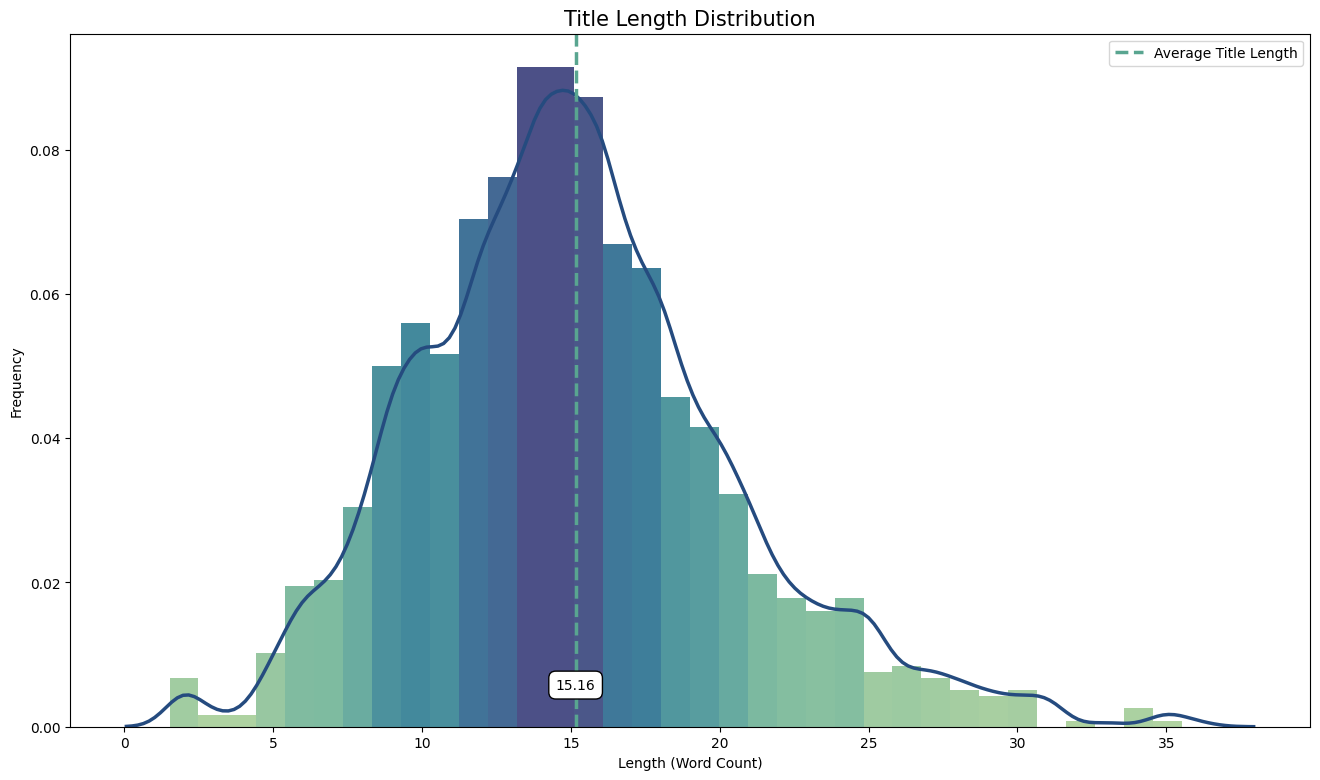

In [26]:
plt.figure(figsize=(16, 9))
hist, bin = np.histogram(
    data['title-length'],
    bins=35,
    density=True
)
norm = plt.Normalize(
    vmin=hist.min(),
    vmax=hist.max()
)
for i in range(len(bin) - 1):
    plt.bar(
        bin[i],
        hist[i],
        width=bin[i+1] - bin[i],
        color=crest(
            norm(hist[i])
        ),
        alpha=0.85
    )
sns.kdeplot(
    data['title-length'],
    color=polito,
    linewidth=2.5,
    linestyle='-',
    bw_adjust=0.5
)
plt.axvline(
    data['title-length'].mean(),
    color=unito,
    linestyle='dashed',
    linewidth=2.5,
    label='Average Title Length'
)
mean = data['title-length'].mean()
plt.text(
    mean,
    plt.gca().get_ylim()[1] * 0.05,
    f'{mean:.2f}',
    fontsize=10,
    ha='center',
    va='bottom',
    bbox=dict(
        facecolor='white',
        boxstyle='round,pad=0.5'
    )
)
plt.title(
    'Title Length Distribution',
    fontsize=15
)
plt.xlabel(
    'Length (Word Count)',
    fontsize=10
)
plt.ylabel(
    'Frequency',
    fontsize=10
)
plt.legend()
plt.savefig(
    f'{output}/title-length-distribution.png',
    dpi=300,
    bbox_inches='tight'
)
plt.show()

In [27]:
plt.close()

2. **Abstract Length Distribution**

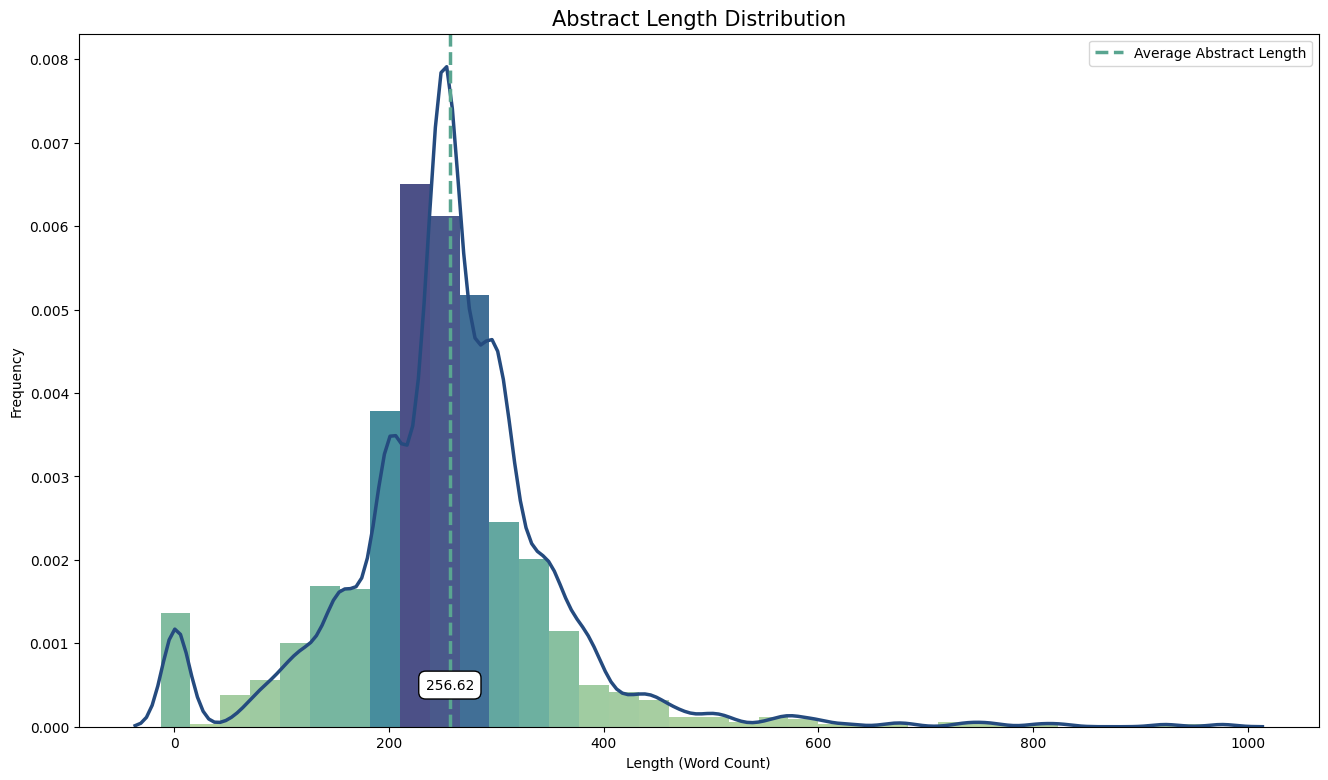

In [28]:
plt.figure(figsize=(16, 9))
hist, bin = np.histogram(
    data['abstract-length'],
    bins=35,
    density=True
)
norm = plt.Normalize(
    vmin=hist.min(),
    vmax=hist.max()
)
for i in range(len(bin) - 1):
    plt.bar(
        bin[i],
        hist[i],
        width=bin[i+1] - bin[i],
        color=crest(
            norm(hist[i])
        ),
        alpha=0.85
    )
sns.kdeplot(
    data['abstract-length'],
    color=polito,
    linewidth=2.5,
    linestyle='-',
    bw_adjust=0.5
)
plt.axvline(
    data['abstract-length'].mean(),
    color=unito,
    linestyle='dashed',
    linewidth=2.5,
    label='Average Abstract Length'
)
mean = data['abstract-length'].mean()
plt.text(
    mean,
    plt.gca().get_ylim()[1] * 0.05,
    f'{mean:.2f}',
    fontsize=10,
    ha='center',
    va='bottom',
    bbox=dict(
        facecolor='white',
        boxstyle='round,pad=0.5'
    )
)
plt.title(
    'Abstract Length Distribution',
    fontsize=15
)
plt.xlabel(
    'Length (Word Count)',
    fontsize=10
)
plt.ylabel(
    'Frequency',
    fontsize=10
)
plt.legend()
plt.savefig(
    f'{output}/abstract-length-distribution.png',
    dpi=300,
    bbox_inches='tight'
)
plt.show()

In [29]:
plt.close()

3. **Title Length Boxplot**

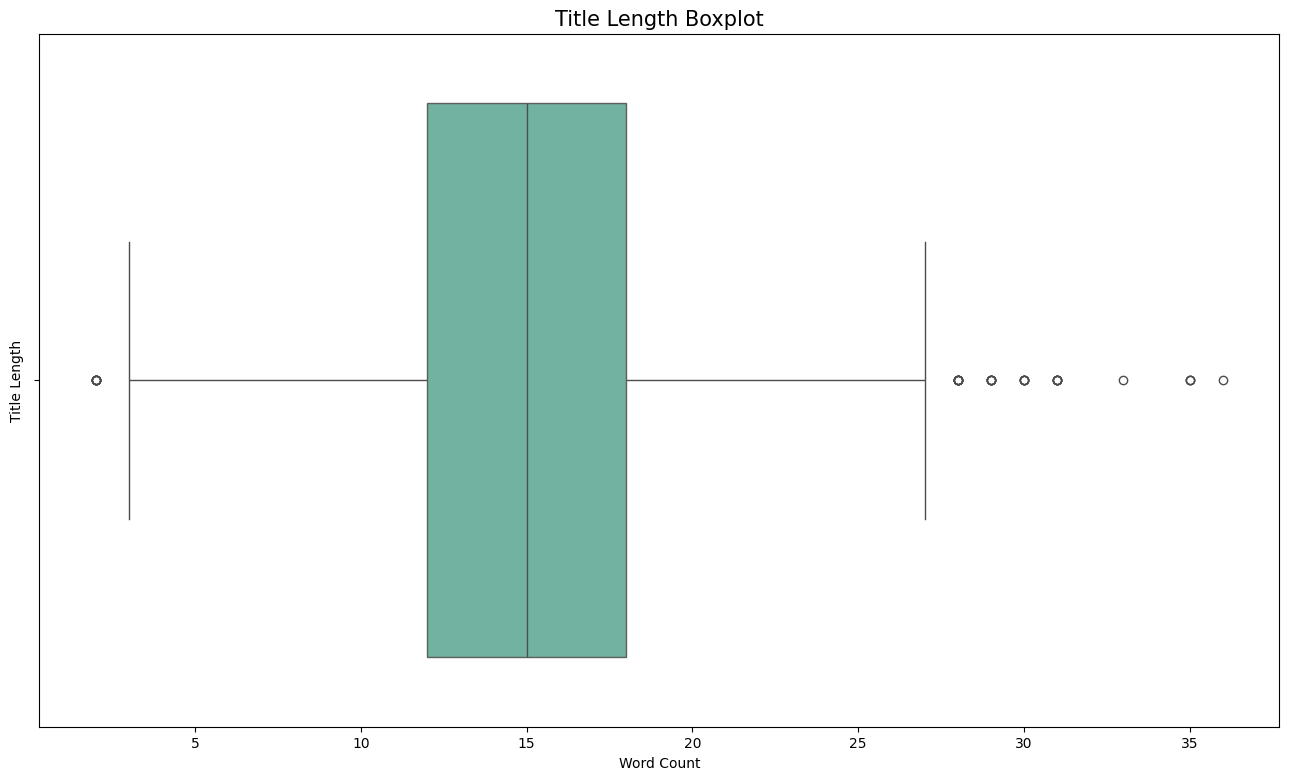

In [30]:
plt.figure(figsize=(16, 9))
sns.boxplot(
    data=data['title-length'].values,
    orient="h",
    color=unito,
    boxprops=dict(
        facecolor=unito,
        alpha=0.85
    )
)
plt.title(
    'Title Length Boxplot',
    fontsize=15
)
plt.xlabel(
    'Word Count',
    fontsize=10
)
plt.ylabel(
    'Title Length',
    fontsize=10
)
plt.savefig(
    f'{output}/title-length-boxplot.png',
    dpi=300,
    bbox_inches='tight'
)
plt.show()

In [31]:
plt.close()

4. **Abstract Length Boxplot**

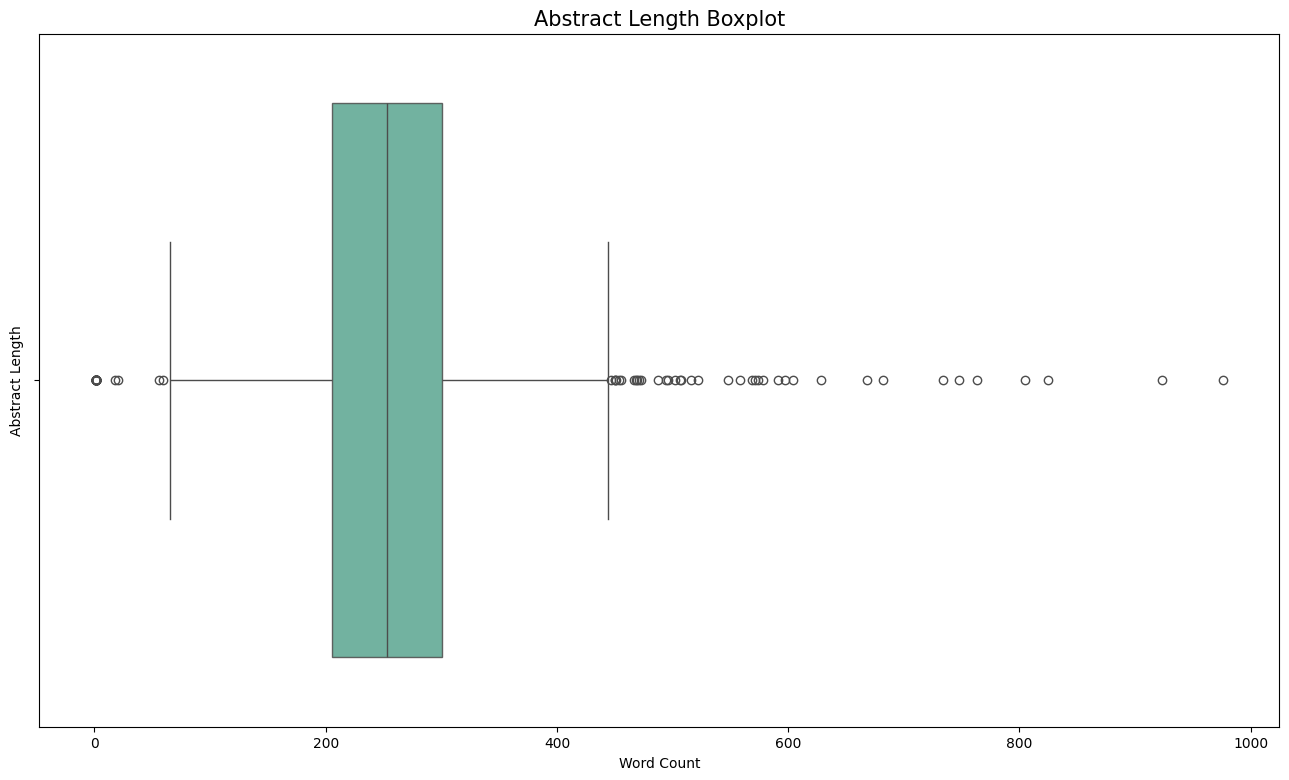

In [32]:
plt.figure(figsize=(16, 9))
sns.boxplot(
    data=data['abstract-length'].values,
    orient="h",
    color=unito,
    boxprops=dict(
        facecolor=unito,
        alpha=0.85
    )
)
plt.title(
    'Abstract Length Boxplot',
    fontsize=15
)
plt.xlabel(
    'Word Count',
    fontsize=10
)
plt.ylabel(
    'Abstract Length',
    fontsize=10
)
plt.savefig(
    f'{output}/abstract-length-boxplot.png',
    dpi=300,
    bbox_inches='tight'
)
plt.show()

In [33]:
plt.close()

5. **Label Distribution**

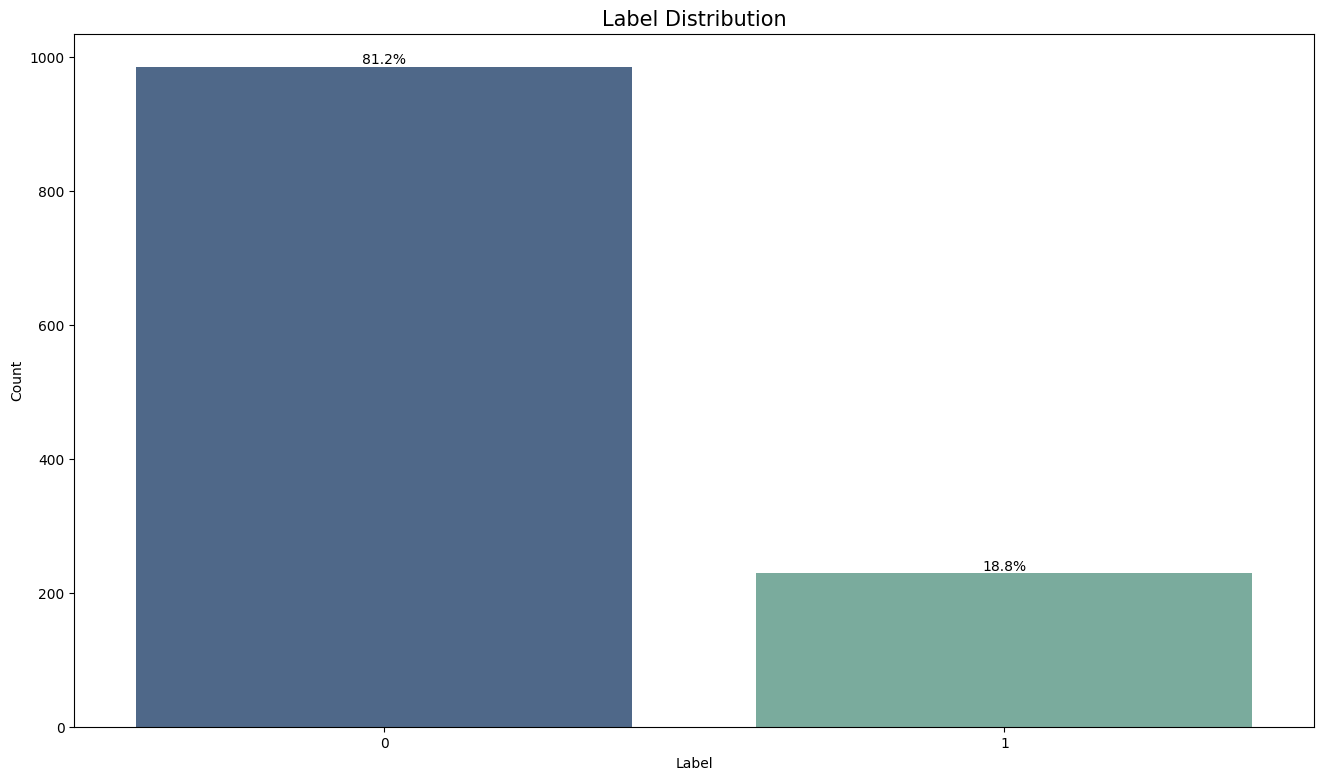

In [34]:
plt.figure(figsize=(16, 9))
sns.barplot(
    x=data['label'].value_counts().index,
    y=data['label'].value_counts().values,
    palette=[polito, unito],
    alpha=0.85
)
plt.title(
    'Label Distribution',
    fontsize=15
)
plt.xlabel(
    'Label',
    fontsize=10
)
plt.ylabel(
    'Count',
    fontsize=10
)
for x, count in enumerate(data['label'].value_counts().values):
    percentage = (count / len(data)) * 100
    plt.text(
        x,
        count + 0.1,
        f'{percentage:.1f}%',
        fontsize=10,
        ha='center',
        va='bottom'
    )
plt.savefig(
    f'{output}/label-distribution.png',
    dpi=300,
    bbox_inches='tight'
)
plt.show()

In [35]:
plt.close()

6. **Outliers Scatter Plot**

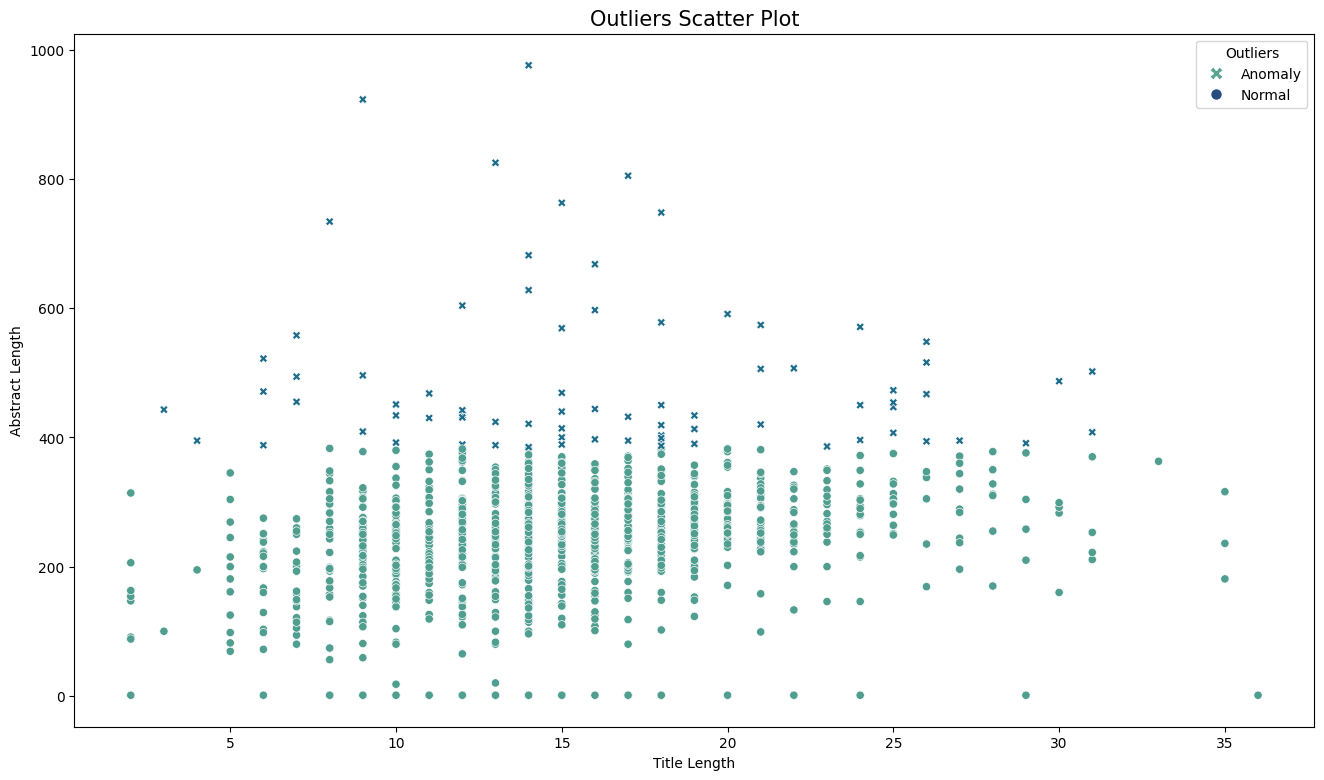

In [36]:
plt.figure(figsize=(16, 9))
sns.scatterplot(
    data=data,
    x='title-length',
    y='abstract-length',
    hue=(data.index.isin(outliers.index)),
    palette='crest',
    style=(data.index.isin(outliers.index)),
    markers={
        True: 'X',
        False: 'o'
    },
    legend='full',
)
legend_handles = [
    mlines.Line2D(
        [], [],
        marker='X',
        color='w',
        markerfacecolor=unito,
        markersize=10,
        label='Anomaly'
    ),
    mlines.Line2D(
        [], [],
        marker='o',
        color='w',
        markerfacecolor=polito,
        markersize=8.5,
        label='Normal'
    )
]
plt.title(
    'Outliers Scatter Plot',
    fontsize=15
)
plt.xlabel(
    'Title Length',
    fontsize=10
)
plt.ylabel(
    'Abstract Length',
    fontsize=10
)
plt.legend(
    handles=legend_handles,
    title='Outliers'
)
plt.savefig(
    f'{output}/outliers-scatterplot.png',
    dpi=300,
    bbox_inches='tight'
)
plt.show()

In [37]:
plt.close()

7. **Word Clouds**

In [38]:
def wordcloud(text, title):
    texts = " ".join(text)
    route = title.lower().replace(" ", "-")
    wordcloud = WordCloud(
        width=1920,
        height=1080,
        stopwords=set(STOPWORDS),
        background_color='black'
    ).generate(texts)
    plt.figure(figsize=(16, 9))
    plt.imshow(
        wordcloud,
        interpolation='bilinear'
    )
    plt.axis("off")
    plt.title(
        title,
        fontsize=15
    )
    plt.savefig(
        f"{output}/{route}.png",
        dpi=300,
        bbox_inches='tight'
    )
    plt.show()

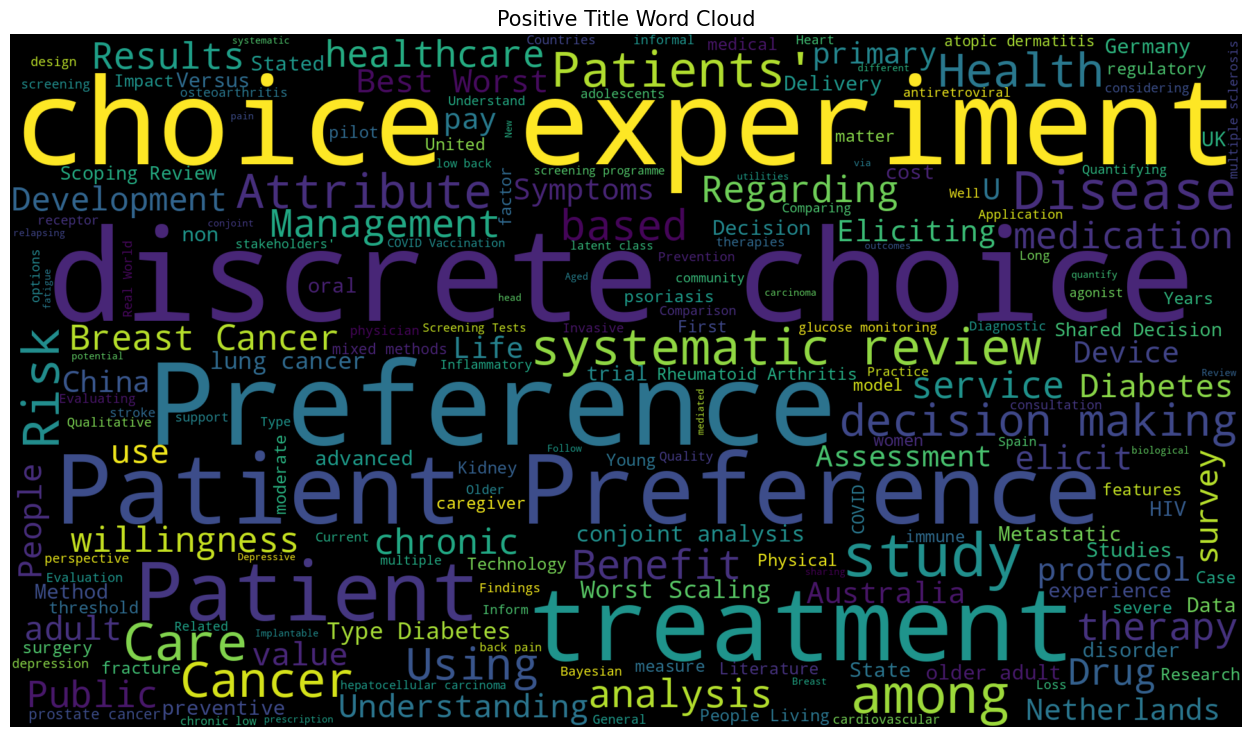

In [39]:
wordcloud(
    data[data['label']==1]['title'].tolist(),
    'Positive Title Word Cloud'
)
plt.close()

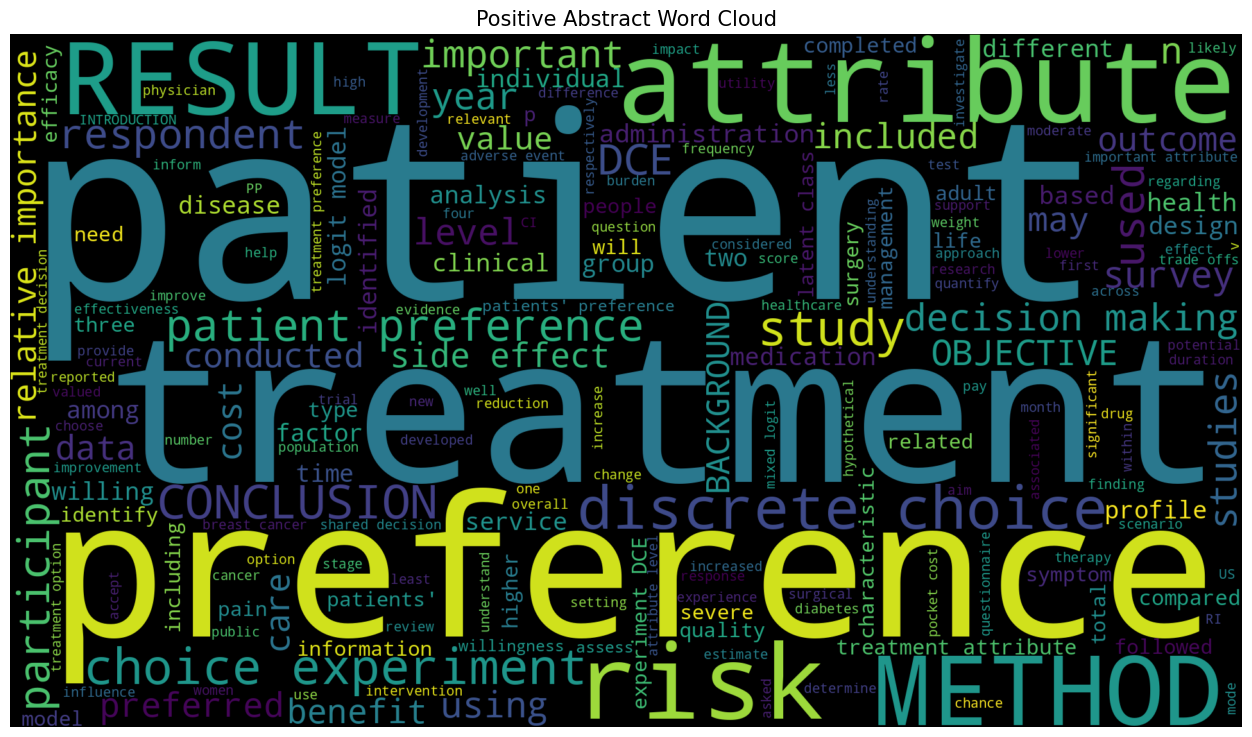

In [40]:
wordcloud(
    data[data['label']==1]['abstract'].tolist(),
    'Positive Abstract Word Cloud'
)
plt.close()

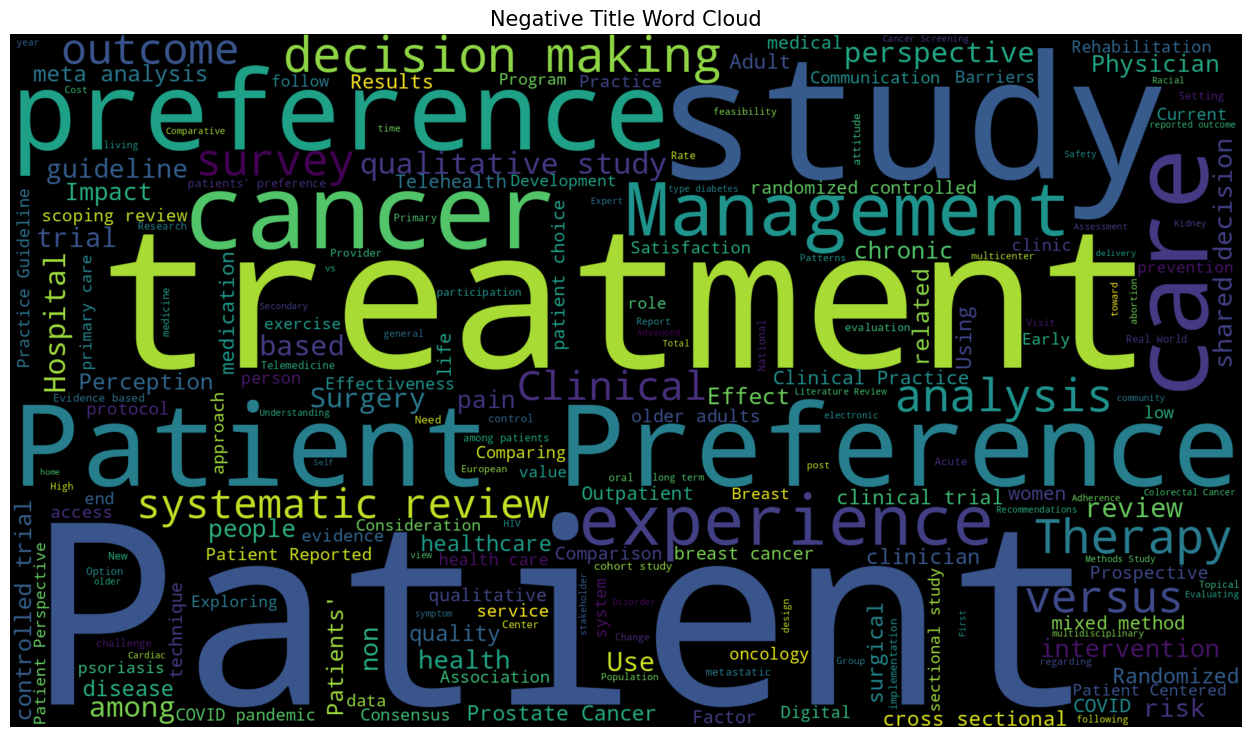

In [41]:
wordcloud(
    data[data['label']==0]['title'].tolist(),
    'Negative Title Word Cloud'
)
plt.close()

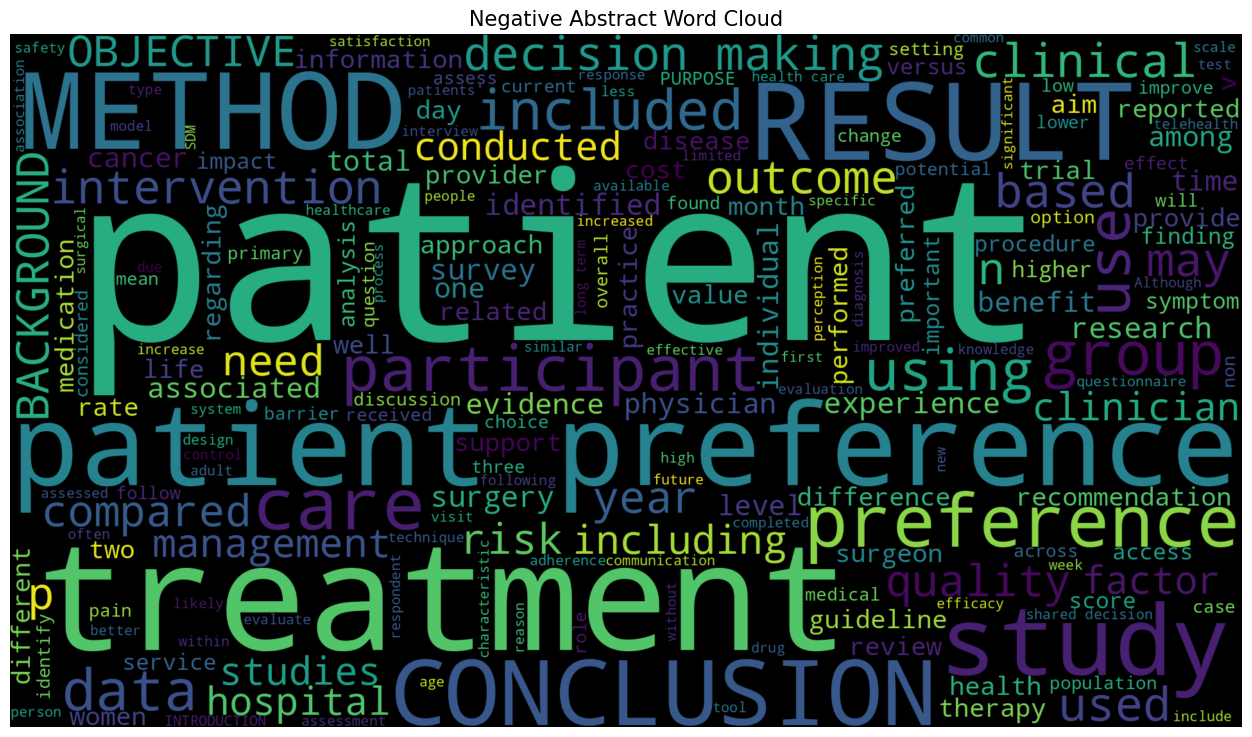

In [42]:
wordcloud(
    data[data['label']==0]['abstract'].tolist(),
    'Negative Abstract Word Cloud'
)
plt.close()

# **Train-Test** *Split*

**Requirements**

In [43]:
import os
import sys
import pandas as pd

from typing import Any
from sklearn.model_selection import StratifiedKFold

In [44]:
input = f"/content/drive/MyDrive/{paths['input-data']}"
data = pd.read_csv(f'{input}/clean-articles-2023.csv')

In [45]:
path = f"/content/drive/MyDrive/{paths['input-data']}"
output = os.path.join(path, 'cv-splits')
if not os.path.exists(output):
    os.makedirs(output)

In [46]:
with open(os.path.join(input, 'logs.txt'), 'w') as file:
    pass

In [47]:
x, y = data[['title', 'abstract']], data['label']
log = f'-' * 50 + f'\noriginal dataset label distribution\n' + '-' * 50
with open(os.path.join(input, 'logs.txt'), 'a') as file:
    file.write(log + '\n')
log = f'count {y.value_counts()}'
with open(os.path.join(input, 'logs.txt'), 'a') as file:
    file.write(log + '\n')
log = f'proportion {y.value_counts(normalize=True)}'
with open(os.path.join(input, 'logs.txt'), 'a') as file:
    file.write(log + '\n')

In [48]:
def splits(
    x: pd.DataFrame,
    y: pd.Series,
    k: int,
    path: str,
    output: str
) -> None:
    """
    splits the dataset into k folds by StratifiedKFold

    args:
        x (pd.DataFrame): features data, with 'title' and 'abstract' columns
        y (pd.Series): labels
        k (int): number of folds to split the data into
        path (str): path to save the train and test split
        output (str): path to output folder to store logs

    returns:
        None
    """
    skf = StratifiedKFold(
        n_splits=k,
        shuffle=True,
        random_state=42
    )
    fold = 1
    for train_idx, test_idx in skf.split(x, y):
        x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        pd.DataFrame({
            'title': x_train['title'],
            'abstract': x_train['abstract'],
            'label': y_train
        }).to_csv(
            os.path.join(path, f'fold-{fold}-train.csv'),
            index=False
        )
        pd.DataFrame({
            'title': x_test['title'],
            'abstract': x_test['abstract'],
            'label': y_test
        }).to_csv(
            os.path.join(path, f'fold-{fold}-test.csv'),
            index=False
        )
        log = f'-' * 5 + f' [{fold}]: train {len(x_train)} | test {len(x_test)}'
        with open(os.path.join(output, 'logs.txt'), 'a') as file:
            file.write(log + '\n')
        log = f'train set {y_train.value_counts(normalize=True)}'
        with open(os.path.join(output, 'logs.txt'), 'a') as file:
            file.write(log + '\n')
        log = f'test set {y_test.value_counts(normalize=True)}'
        with open(os.path.join(output, 'logs.txt'), 'a') as file:
            file.write(log + '\n')
        fold += 1

*Fibonacci Sequence:* **[2, 3, 5, 8, 13, 21]**

In [49]:
sequence = [2, 3, 5, 8, 13, 21]
for idx, seed in enumerate(sequence):
    percentage = (idx + 1) / len(sequence) * 100
    sys.stdout.write(f"\rsplitting data... {percentage:.2f}%")
    sys.stdout.flush()
    log = f'-' * 50 + f'\nseed: {seed}\n' + '-' * 50
    with open(os.path.join(input, 'logs.txt'), 'a') as file:
        file.write(log + '\n')
    path = os.path.join(output, f'k-fold-{seed}')
    if not os.path.exists(path):
        os.makedirs(path)
    splits(x, y, seed, path, input)

splitting data... 100.00%